# TASK 1: User Overview analysis

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../scripts')
from Clean_data import clean_data
from Extract_data import extract_data

In [3]:
# Import the dataset
df = pd.read_csv("../data/Cleaned_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (s)                                  150001 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

## Sub-tasks

>## Identifying the top 10 handsets used by the customers </br>

The handsets type of the customers are stored in the column named `Handset Type`. But before extracting the information for this column, we should identify each unique user/customer. As a matter of fact, a customer can be identified by either his/her IMSI, MSISDN/number or IMEI.

In [4]:
# Search the column that have the less number of missing values
IdVariable = clean_data(df[['IMSI','MSISDN/Number', 'IMEI','Handset Type']])
missingCol,_,_ = IdVariable.missing_values(verbose=False)
missingCol

MSISDN/Number    1066
IMEI              572
Handset Type      572
IMSI              570
dtype: int64

Thus one can choose to use the `IMSI` to identify each customer because we get more information using this field instead of `IMEI` or `MSISDN/Number`. Nethertheless, one can also choose to use the `IMEI`. Since we're looking for the handset type, we can just focus on the **IMEI** because it's an unique number which identify a device on a mobile network. Furthermore, without the IMEI, we can't identify the handset type - this is the reason why we get the same number of missing values for those two columns. Even if, we get less missing values for IMSI, this caracteristics does not ensure that we'll get the maximum of information relative to the handset type.

In [5]:
def topN(df,col,topn,undefined=True,plot=False):
    if undefined==False:
        topn = df.loc[df[col]!='undefined',col].value_counts()[:topn]
    else:
        topn = df.loc[:,col].value_counts()[:topn]
    if plot==True:
        fig = plt.bar(x=topn.index,height=topn.values)
    return topn

In [6]:
# Extract the unique customer from the table
UniqueUser = df.loc[:,['IMEI','Handset Manufacturer','Handset Type']].dropna(how="all")
# Drop the duplicates
UniqueUser = UniqueUser.drop_duplicates()
UniqueUser.to_csv("../data/UniqueUser.csv")
# Count the number of each handset type and identify the top 10
topN(UniqueUser,'Handset Type',10)

Huawei B528S-23A                10638
Apple iPhone 6S (A1688)          6765
undefined                        6716
Apple iPhone 6 (A1586)           6271
Apple iPhone 7 (A1778)           4721
Apple iPhone Se (A1723)          3764
Apple iPhone 8 (A1905)           3550
Samsung Galaxy S8 (Sm-G950F)     3275
Apple iPhone Xr (A2105)          3077
Samsung Galaxy J5 (Sm-J530)      2760
Name: Handset Type, dtype: int64

In [7]:
# Count the number of each handset type and identify the top 10 (without undefined handset type)
Top10HansType = topN(UniqueUser,'Handset Type',10,undefined=False)
Top10HansType

Huawei B528S-23A                10638
Apple iPhone 6S (A1688)          6765
Apple iPhone 6 (A1586)           6271
Apple iPhone 7 (A1778)           4721
Apple iPhone Se (A1723)          3764
Apple iPhone 8 (A1905)           3550
Samsung Galaxy S8 (Sm-G950F)     3275
Apple iPhone Xr (A2105)          3077
Samsung Galaxy J5 (Sm-J530)      2760
Samsung Galaxy A5 Sm-A520F       2721
Name: Handset Type, dtype: int64

>## Identify the three top handset manufacturer

In [8]:
# Identify the top 3 manufacturer
topN(UniqueUser,'Handset Manufacturer',topn=3)

Apple      42687
Samsung    30981
Huawei     21743
Name: Handset Manufacturer, dtype: int64

>## Identify the top 5 handsets per top 3 handset manufacturer

In [72]:
# Function to extract the top n type of handset for the top m manufacturer
def topTypeManufact(df,nmanufact=3,ntype=5):
    topNManufact = topN(df,'Handset Manufacturer',topn=nmanufact,undefined=False)
    res = pd.DataFrame(columns=['Manufacturer','Type','Count'])
    for manufacturer in topNManufact.index:
        temp = df.loc[df['Handset Manufacturer']==manufacturer,'Handset Type'].value_counts()[:ntype]
        temp2 = pd.DataFrame({'Manufacturer':[manufacturer]*ntype,'Type':temp.index,'Count':temp.to_list()})
        res = pd.concat([res,temp2])
    return res.reset_index(drop=True)

In [74]:
# Identify the top 5 handsets per top 3 handset manufacturer
topTypeManufact(df=UniqueUser,nmanufact=1,ntype=1)

,Manufacturer,Type,Count
0,Apple,Apple iPhone 6S (A1688),6765


>## Task 1.1: Get an overview of the users’ behavior on those applications

In [11]:
dfData = df.loc[:,['Bearer Id','Dur. (s)','MSISDN/Number','Social Media DL (Bytes)','Social Media UL (Bytes)',
                                  'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
                                  'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                                  'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
                                  'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
                                  'Total UL (Bytes)', 'Total DL (Bytes)']]

In [12]:
DataByte = extract_data(dfData)

In [13]:
DataUser = DataByte.merge_data('MSISDN/Number')
DataUser

,Number of session,Dur. (s),Social Media,Google,Email,Youtube,Gaming,Other,Total UL (Bytes),Total DL (Bytes),Total
MSISDN/Number,,,,,,,,,,,
3.360100e+10,1,116720.0,2232135.0,4389005.0,1331362.0,21624548.0,8.124587e+08,386570872.0,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,1,181230.0,2660565.0,5334863.0,3307781.0,12432223.0,1.197501e+08,281710071.0,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,1,134969.0,3195623.0,3443126.0,3205380.0,21333570.0,5.388277e+08,501693672.0,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,1,49878.0,280294.0,9678493.0,2284670.0,6977321.0,3.911261e+08,35279702.0,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,2,37104.0,2912542.0,18499616.0,3305469.0,41533002.0,1.314798e+09,804804484.0,94280527.0,1.363130e+09,1.457411e+09
...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1,8810.0,300183.0,7531269.0,1006915.0,26647843.0,6.603614e+08,295282817.0,26716429.0,6.879252e+08,7.146416e+08
3.379000e+10,1,140988.0,498569.0,5429705.0,2514097.0,19851572.0,4.370033e+08,211115113.0,35732243.0,4.445751e+08,4.803073e+08
3.197021e+12,1,86399.0,715224.0,10438660.0,1520771.0,11959905.0,1.780487e+08,470526473.0,37295915.0,1.948281e+08,2.321240e+08


In [14]:
# Function to convert seconds into hours
def convert_sec_to_day(df,duration_col):
    """This function converts the duration (s) into days"""
    day = 3600*24
    df.loc[:,duration_col] = df.loc[:,duration_col]/day
    return df.loc[:,duration_col]

In [15]:
DataUserDay = DataUser.copy()
DataUserDay.loc[:,"Dur. (s)"] = convert_sec_to_day(DataUser,"Dur. (s)")
DataUserDay = DataUser.rename(columns={'Dur. (s)':'Duration (days)'})
DataUserDay

,Number of session,Duration (days),Social Media,Google,Email,Youtube,Gaming,Other,Total UL (Bytes),Total DL (Bytes),Total
MSISDN/Number,,,,,,,,,,,
3.360100e+10,1,1.350926,2232135.0,4389005.0,1331362.0,21624548.0,8.124587e+08,386570872.0,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,1,2.097569,2660565.0,5334863.0,3307781.0,12432223.0,1.197501e+08,281710071.0,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,1,1.562141,3195623.0,3443126.0,3205380.0,21333570.0,5.388277e+08,501693672.0,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,1,0.577292,280294.0,9678493.0,2284670.0,6977321.0,3.911261e+08,35279702.0,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,2,0.429444,2912542.0,18499616.0,3305469.0,41533002.0,1.314798e+09,804804484.0,94280527.0,1.363130e+09,1.457411e+09
...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1,0.101968,300183.0,7531269.0,1006915.0,26647843.0,6.603614e+08,295282817.0,26716429.0,6.879252e+08,7.146416e+08
3.379000e+10,1,1.631806,498569.0,5429705.0,2514097.0,19851572.0,4.370033e+08,211115113.0,35732243.0,4.445751e+08,4.803073e+08
3.197021e+12,1,0.999988,715224.0,10438660.0,1520771.0,11959905.0,1.780487e+08,470526473.0,37295915.0,1.948281e+08,2.321240e+08


>## Task 1.2: Conduct an exploratory data analysis on those data & communicate useful insights

### Non-Graphical Univariate Analysis

In [16]:
DataUserDay.describe()

,Number of session,Duration (days),Social Media,Google,Email,Youtube,Gaming,Other,Total UL (Bytes),Total DL (Bytes),Total
count,106856.000000,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,1.389777,1.487477,2.547967e+06,1.088243e+07,3.148796e+06,3.155840e+07,5.997690e+08,5.985088e+08,5.730706e+07,6.336527e+08,6.909597e+08
std,0.809863,1.173692,1.908038e+06,7.544861e+06,2.222400e+06,2.129492e+07,4.491505e+08,4.489221e+08,3.561588e+07,4.645551e+08,4.910487e+08
min,0.000000,0.082662,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,3.063580e+05,1.490450e+05,9.512288e+06,8.827082e+06,3.324901e+07
25%,1.000000,0.825324,1.211282e+06,5.942636e+06,1.674481e+06,1.863109e+07,2.880631e+08,2.855599e+08,3.642382e+07,3.148271e+08,3.585877e+08
50%,1.000000,1.124468,2.303756e+06,9.586153e+06,2.799824e+06,2.680038e+07,5.423492e+08,5.398323e+08,4.677551e+07,5.703677e+08,6.179227e+08
75%,2.000000,1.962303,3.307509e+06,1.321474e+07,3.847198e+06,3.792798e+07,7.773041e+08,7.753975e+08,6.566037e+07,8.073645e+08,8.574234e+08
max,18.000000,22.054144,4.337478e+07,1.521919e+08,4.241878e+07,4.529588e+08,7.749432e+09,8.167878e+09,7.295774e+08,8.156743e+09,8.846226e+09


The minimum number of session per consumer is $0$. So there are some clients of TellCo who don't use the internet network.
The average session duration in days per user is $1.48$. Thus, one could say that most of the users are not very active

In [17]:
# Compute the coefficient of variation
def compute_CoefVar(df):
    CoefVar = pd.Series((df.std()/df.mean())*100,name='Coefficient of variation')
    return CoefVar

In [18]:
compute_CoefVar(DataUserDay)

Number of session    58.272853
Duration (days)      78.904844
Social Media         74.884729
Google               69.330640
Email                70.579365
Youtube              67.477813
Gaming               74.887241
Other                75.006773
Total UL (Bytes)     62.149190
Total DL (Bytes)     73.313831
Total                71.067628
Name: Coefficient of variation, dtype: float64

Those coefficient of variation revealed how scarced the data are for the considered variables.

In [19]:
DataApp = DataUser[['Social Media','Google','Email','Youtube','Gaming','Other','Total UL (Bytes)','Total DL (Bytes)','Total']]

In [20]:
# Function to convert into Mbytes
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df.loc[:,bytes_data] = df.loc[:,bytes_data] / megabyte
    return df.loc[:,bytes_data]

In [21]:
DataAppMb = convert_bytes_to_megabytes(DataApp,['Social Media','Google','Email','Youtube','Gaming','Other','Total UL (Bytes)','Total DL (Bytes)','Total'])

In [22]:
# FUNCTION FOR PLOTTING
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
# Function to create scatter plot
def plot_scatter(df,xcol:str,ycol:str,setLoop,ax,forLoop=False):
    if forLoop==True:
        pos = setLoop.index(xcol)
        sns.scatterplot(data=df,x=xcol,y=ycol,ax=axs[pos])
        axs[pos].set_title(f'{xcol} VS Total')
    else:
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df,x=xcol,y=ycol)
        plt.title(f'{xcol} VS Total')
        plt.show()
    
def plot_interactive_hist(df:pd.DataFrame,column:str):
    fig = px.histogram(df,x=column,title=f'Distribution of {column}')
    fig.show()
    
def plot_interactive_count(df:pd.DataFrame,column:str):
    ValCount = df[column].value_counts()
    fig = px.bar(df,x=ValCount.index,y=ValCount.values,labels={'x':column,'y':'# of users'},title=f'Distribution of {column}')
    fig.show()

In [23]:
# The data are in Mbytes
DataAppMb.describe()

,Social Media,Google,Email,Youtube,Gaming,Other,Total UL (Bytes),Total DL (Bytes),Total
count,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000
mean,2.547967,10.882434,3.148796,31.558399,599.769011,598.508764,57.307065,633.652681,690.959746
std,1.908038,7.544861,2.222400,21.294918,449.150462,448.922110,35.615877,464.555056,491.048704
min,0.001563,0.040330,0.018176,0.078903,0.306358,0.149045,9.512288,8.827082,33.249009
25%,1.211281,5.942636,1.674481,18.631089,288.063112,285.559911,36.423821,314.827064,358.587731
50%,2.303756,9.586153,2.799824,26.800376,542.349207,539.832343,46.775509,570.367723,617.922683
75%,3.307509,13.214740,3.847198,37.927976,777.304138,775.397531,65.660374,807.364490,857.423408
max,43.374779,152.191852,42.418782,452.958769,7749.432234,8167.877776,729.577380,8156.743493,8846.226494


Looking at the description, most of TellCo consumer use gaming and other applications. Far behind these two categories, the consumer use Youtube app.</br>
One could then ask if this is due to the fact that game applications or others are data-consuming...

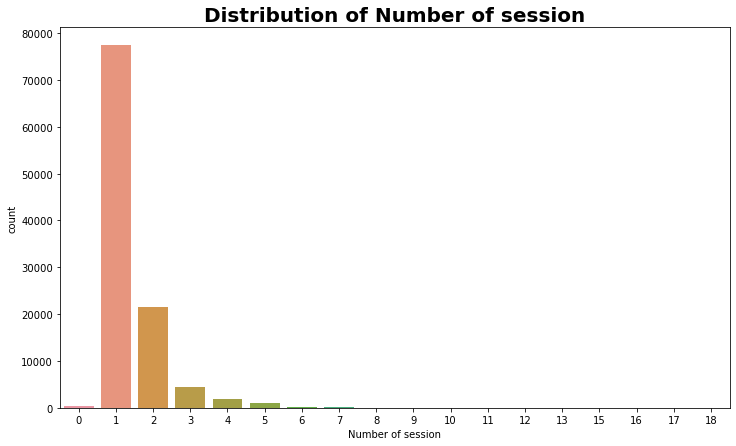

In [24]:
plot_count(DataUser,"Number of session")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_count(DataUser,"Number of session")

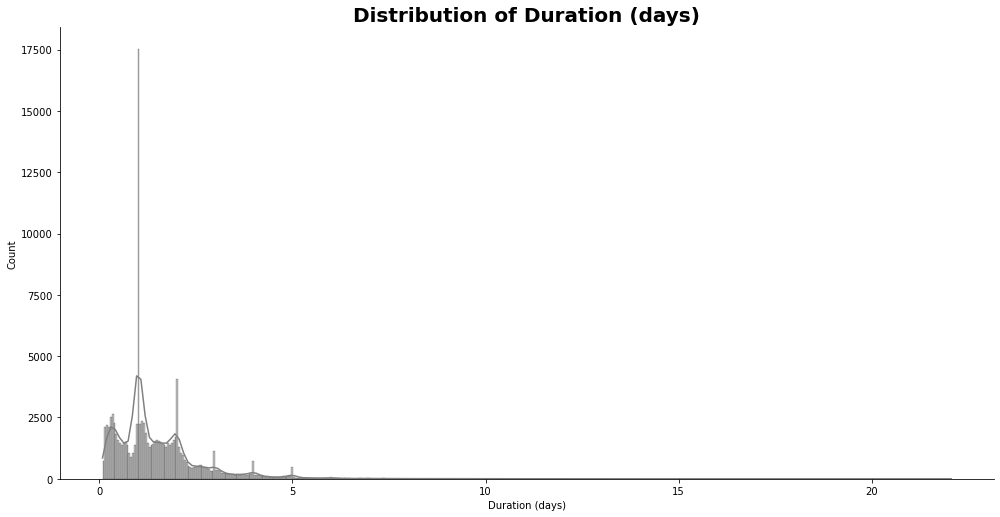

In [25]:
plot_hist(DataUserDay,"Duration (days)","grey")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_hist(DataUserDay,"Duration (days)")

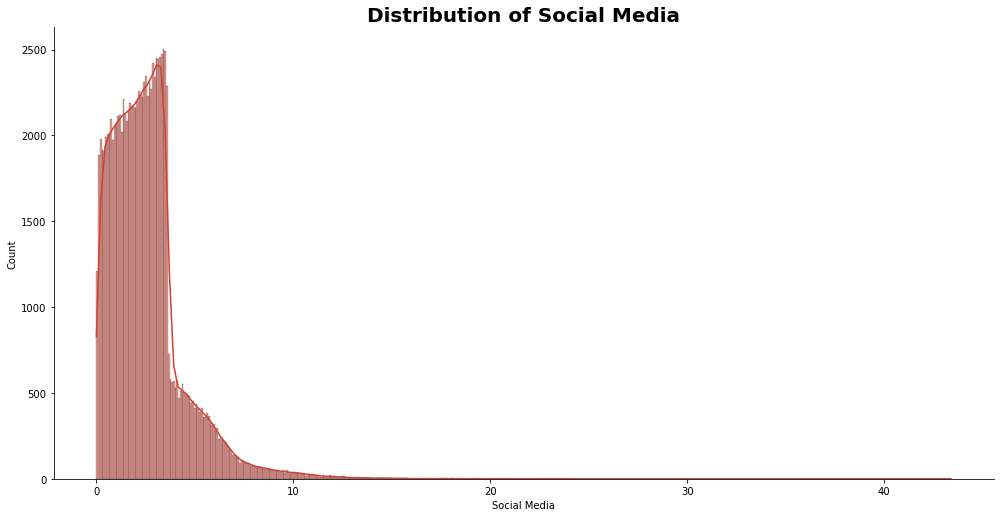

In [26]:
plot_hist(DataAppMb,'Social Media',"#d14033")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_hist(DataAppMb,'Social Media')

Looking at the plot, most of the users have a session duration less than two days.

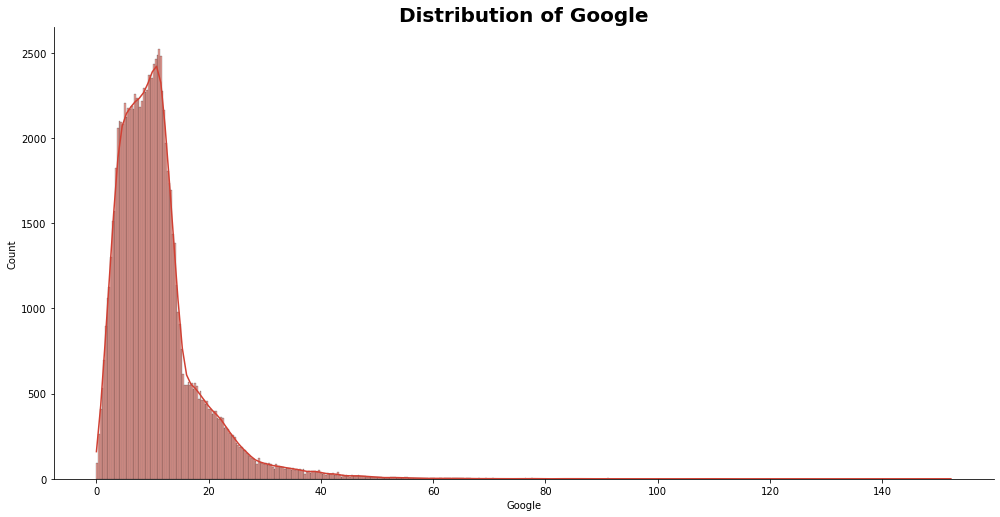

In [27]:
plot_hist(DataAppMb,'Google',"#d14033")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_hist(DataAppMb,'Google')

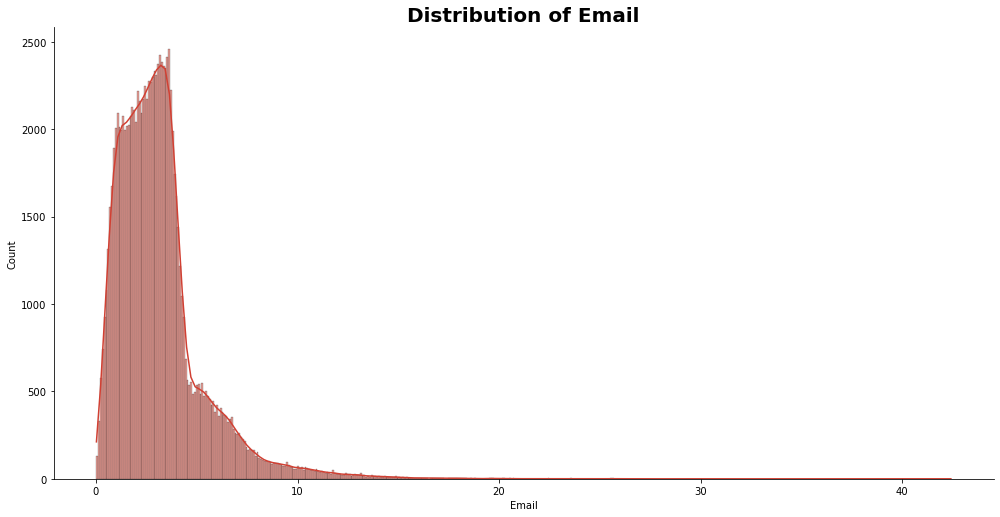

In [28]:
plot_hist(DataAppMb,'Email',"#d14033")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_hist(DataAppMb,'Email')

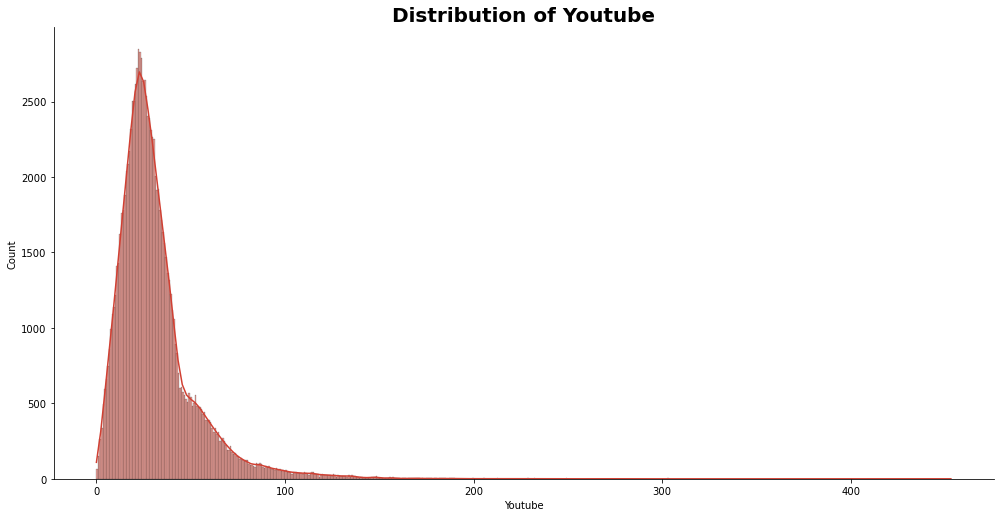

In [29]:
plot_hist(DataAppMb,'Youtube',"#d14033")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_hist(DataAppMb,'Youtube')

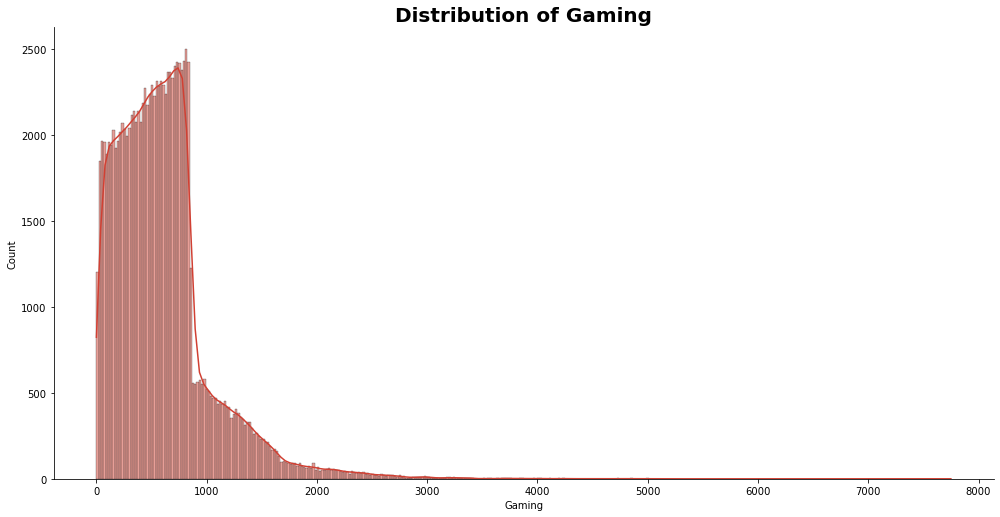

In [30]:
plot_hist(DataAppMb,'Gaming',"#d14033")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_hist(DataAppMb,'Gaming')

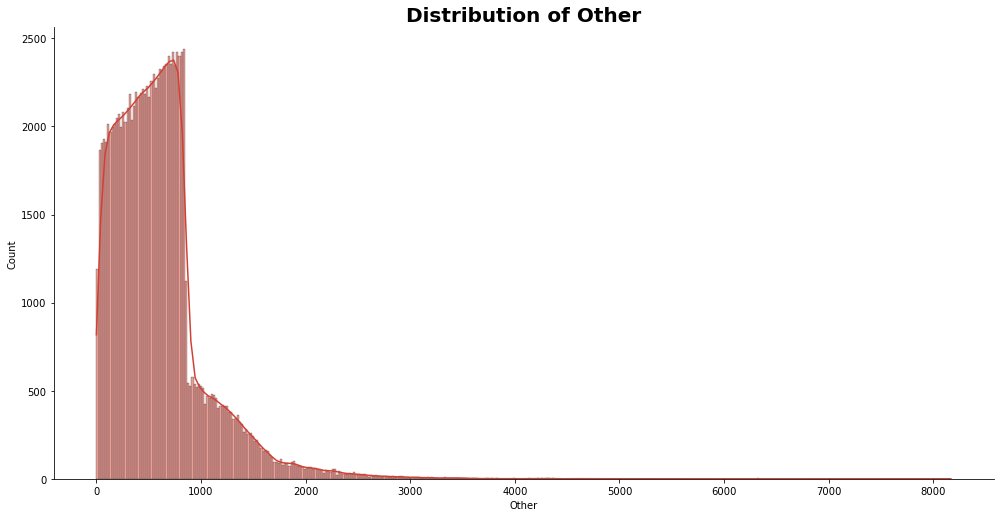

In [31]:
plot_hist(DataAppMb,'Other',"#d14033")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_hist(DataAppMb,'Other')

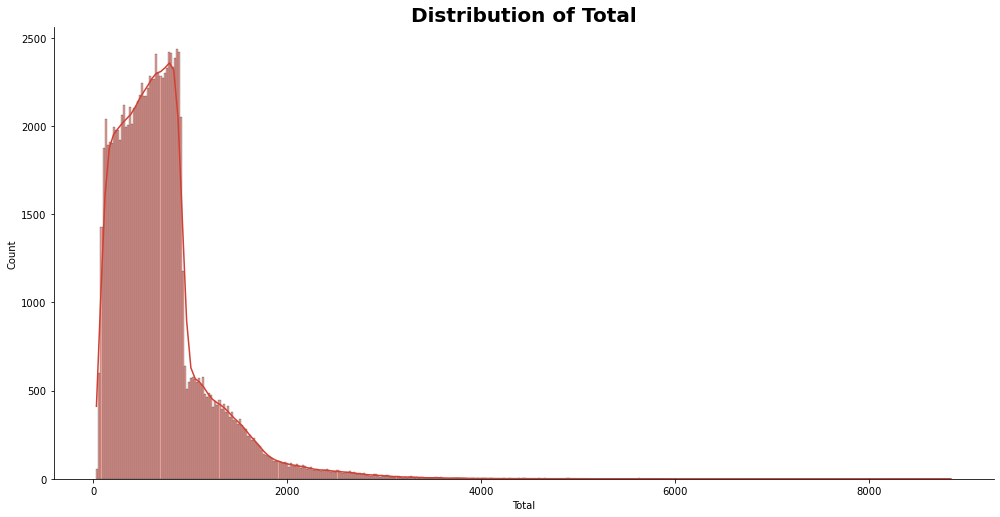

In [32]:
plot_hist(DataAppMb,'Total',"#d14033")

##################### To see the result, just change the cell type to code </br> #####################
plot_interactive_hist(DataAppMb,'Total')

In [33]:
application = DataAppMb.columns[:5].tolist()
application

['Social Media', 'Google', 'Email', 'Youtube', 'Gaming']

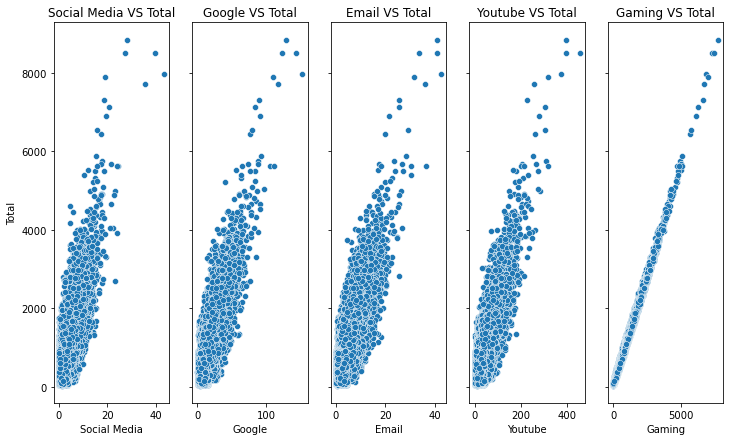

<Figure size 864x504 with 0 Axes>

In [34]:
fig, axs = plt.subplots(ncols=len(application),sharey=True,figsize=(12, 7))
plt.figure(figsize=(12, 7))
for app in application:
    plot_scatter(DataAppMb,xcol=app,ycol='Total',setLoop=application,ax=axs,forLoop=True)
plt.show()

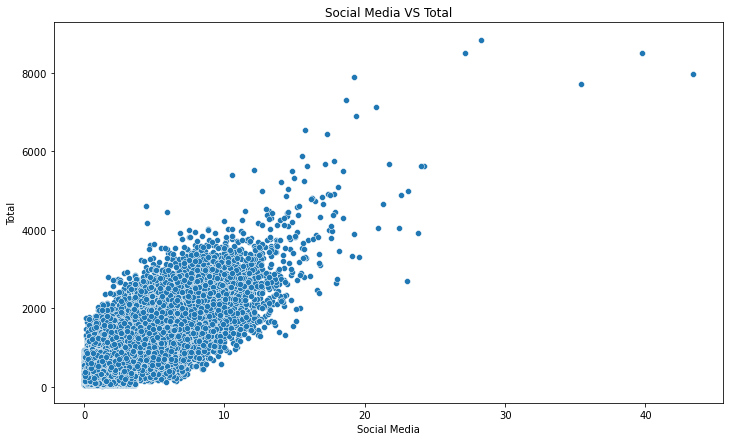

In [35]:
plot_scatter(DataAppMb,xcol='Social Media',ycol='Total',setLoop=None,ax=None)

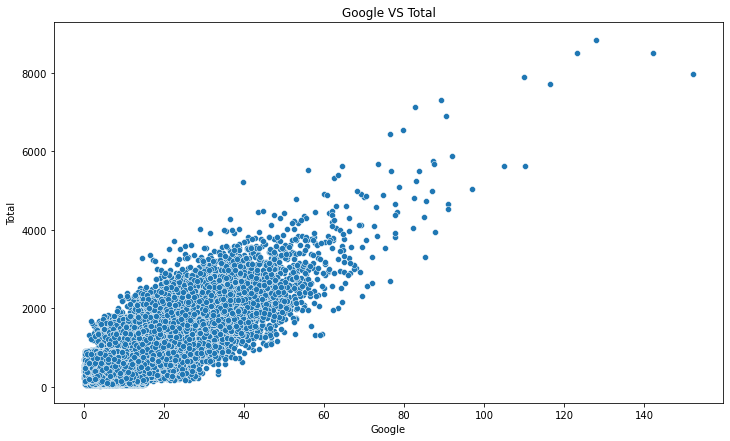

In [36]:
plot_scatter(DataAppMb,xcol='Google',ycol='Total',setLoop=None,ax=None)

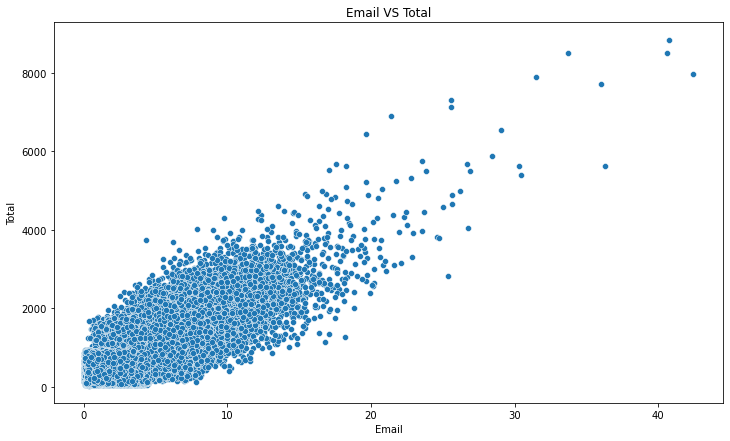

In [37]:
plot_scatter(DataAppMb,xcol='Email',ycol='Total',setLoop=None,ax=None)

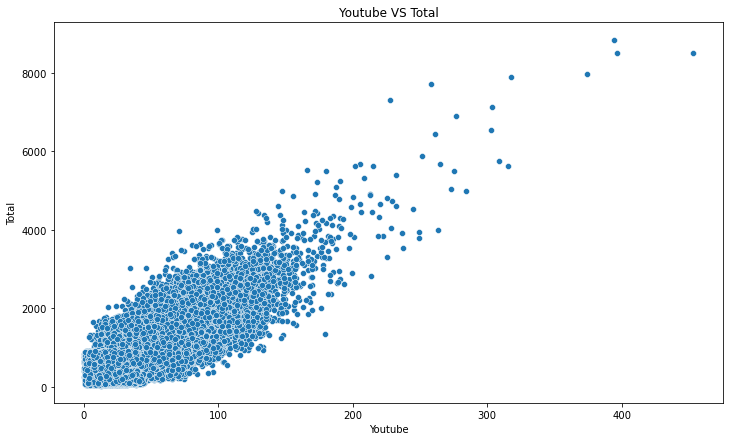

In [38]:
plot_scatter(DataAppMb,xcol='Youtube',ycol='Total',setLoop=None,ax=None)

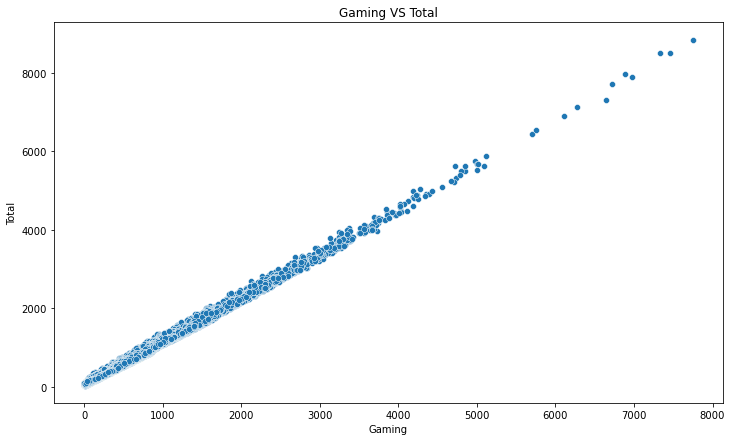

In [39]:
plot_scatter(DataAppMb,xcol='Gaming',ycol='Total',setLoop=None,ax=None)

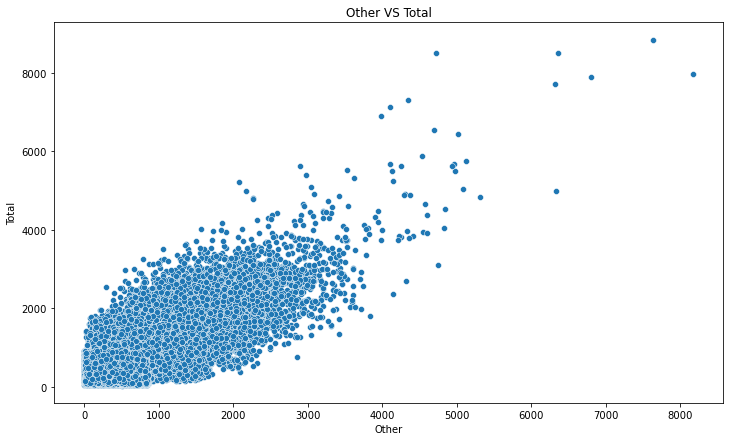

In [40]:
plot_scatter(DataAppMb,xcol='Other',ycol='Total',setLoop=None,ax=None)

### Variables transformation

### Correlation analysis

Let's segment the users into the five top decile.

In [41]:
DfDecile = DataUserDay[['Duration (days)','Total']]
DfDecile['Total'] = convert_bytes_to_megabytes(DfDecile,'Total')
DfDecile

,Duration (days),Total
MSISDN/Number,,
3.360100e+10,1.350926,878.690574
3.360100e+10,2.097569,156.859643
3.360100e+10,1.562141,595.966483
3.360101e+10,0.577292,422.320698
3.360101e+10,0.429444,1457.410944
...,...,...
3.379000e+10,0.101968,714.641641
3.379000e+10,1.631806,480.307335
3.197021e+12,0.999988,232.123971


In [42]:
# Compute the decile and extract the top 5
DfDecile['Decile_rank'] = pd.qcut(DfDecile['Duration (days)'],10,labels = False)
DfDecileTop5 = DfDecile.loc[DfDecile['Decile_rank']<5,:]
# Compute the total data per decile class
DfDecileTop5.groupby('Decile_rank')['Total'].sum()

Decile_rank
0    5.439240e+06
1    6.109452e+06
2    6.536500e+06
3    6.525244e+06
4    4.443627e+06
Name: Total, dtype: float64

In [43]:
def plot_heatmap_corr(df,title,cbar=True):
    plt.figure(figsize=(12,7))
    sns.heatmap(df,annot=True,cbar=cbar)
    plt.title(title, size=18, fontweight='bold')
    plt.show()

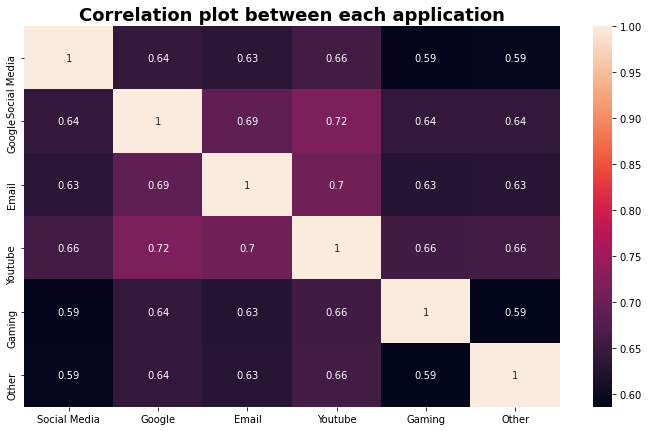

,Social Media,Google,Email,Youtube,Gaming,Other
Social Media,1.000000,0.643071,0.634016,0.659545,0.590048,0.591727
Google,0.643071,1.000000,0.688460,0.718539,0.642037,0.642608
Email,0.634016,0.688460,1.000000,0.704632,0.627474,0.631024
Youtube,0.659545,0.718539,0.704632,1.000000,0.657408,0.660380
Gaming,0.590048,0.642037,0.627474,0.657408,1.000000,0.586394
Other,0.591727,0.642608,0.631024,0.660380,0.586394,1.000000


In [44]:
application = DataAppMb.columns[:6].tolist()
plot_heatmap_corr(DataAppMb[application].corr(),'Correlation plot between each application')
DataAppMb[application].corr()

Darker the color, lower the correlation is between the data used per application. Looking at the graph and the matrix, there is a high correlation between the applications.

### Dimensionality reduction (PCA)

In [45]:
# Extract the data to perform our dimensionality reduction
DfPCA = DataUserDay[['Duration (days)','Social Media','Google','Email','Youtube','Gaming','Other','Total']]
DfPCA

,Duration (days),Social Media,Google,Email,Youtube,Gaming,Other,Total
MSISDN/Number,,,,,,,,
3.360100e+10,1.350926,2232135.0,4389005.0,1331362.0,21624548.0,8.124587e+08,386570872.0,8.786906e+08
3.360100e+10,2.097569,2660565.0,5334863.0,3307781.0,12432223.0,1.197501e+08,281710071.0,1.568596e+08
3.360100e+10,1.562141,3195623.0,3443126.0,3205380.0,21333570.0,5.388277e+08,501693672.0,5.959665e+08
3.360101e+10,0.577292,280294.0,9678493.0,2284670.0,6977321.0,3.911261e+08,35279702.0,4.223207e+08
3.360101e+10,0.429444,2912542.0,18499616.0,3305469.0,41533002.0,1.314798e+09,804804484.0,1.457411e+09
...,...,...,...,...,...,...,...,...
3.379000e+10,0.101968,300183.0,7531269.0,1006915.0,26647843.0,6.603614e+08,295282817.0,7.146416e+08
3.379000e+10,1.631806,498569.0,5429705.0,2514097.0,19851572.0,4.370033e+08,211115113.0,4.803073e+08
3.197021e+12,0.999988,715224.0,10438660.0,1520771.0,11959905.0,1.780487e+08,470526473.0,2.321240e+08


In [46]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
minmax_scaler = MinMaxScaler()
pca = decomposition.PCA(n_components=5)

In [47]:
# Scale the data using minmax scaler
DfPcaScaled = minmax_scaler.fit_transform(DfPCA)
# Fit pca
pca.fit(DfPcaScaled)
# Get the score of the individuals
#scores = pca.fit_transform(DfPcaScaled)
#PCname = []
#for pcind in range(5):
#    PCname.append('PC'+str(pcind+1))
#scores = pd.DataFrame(scores,columns=PCname)
#scores

PCA(n_components=5)

In [48]:
PCDf = pd.DataFrame({'PC':range(1,6),'Explained Variance':pca.explained_variance_ratio_,
                     'Cumulative Explained Variance':pca.explained_variance_ratio_.cumsum()})
PCDf

,PC,Explained Variance,Cumulative Explained Variance
0,1,0.700816,0.700816
1,2,0.091921,0.792737
2,3,0.056269,0.849006
3,4,0.048388,0.897394
4,5,0.038405,0.935800


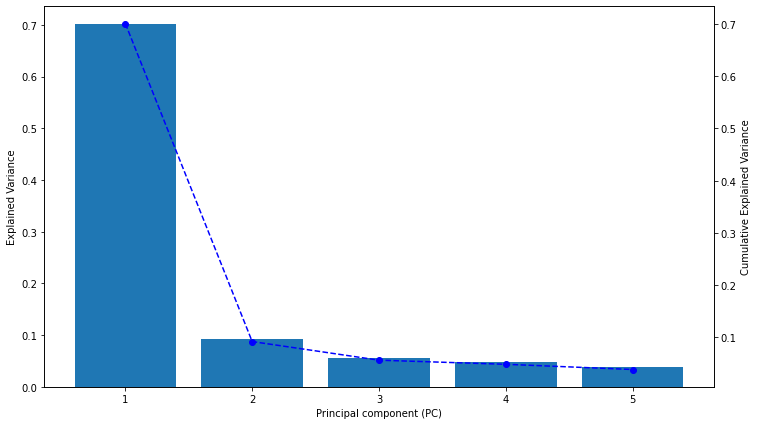

In [49]:
# Scree plot
plt.figure(figsize=(12,7))
plt.bar(data=PCDf,x='PC',height='Explained Variance')
plt.xlabel('Principal component (PC)')
plt.ylabel('Explained Variance')
ax2 = plt.twinx()
ax2.plot(PCDf['PC'], PCDf['Explained Variance'], '--ob')
ax2.set_ylabel('Cumulative Explained Variance')
plt.show()